In [2]:
pip install imblearn

     |████████████████████████████████| 206 kB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 22.3 MB 43.5 MB/s eta 0:00:01█████▌        | 16.4 MB 43.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install xgboost

     |████████████████████████████████| 157.5 MB 4.2 MB/s eta 0:00:011    |█████████▌                      | 46.5 MB 23.0 MB/s eta 0:00:05    |███████████████▌                | 76.0 MB 71.7 MB/s eta 0:00:02��█▎              | 85.0 MB 5.8 MB/s eta 0:00:13��██████████████▏             | 89.4 MB 5.8 MB/s eta 0:00:12     |██████████████████▌             | 91.1 MB 5.8 MB/s eta 0:00:12MB/s eta 0:00:11�████████▍           | 100.2 MB 5.8 MB/s eta 0:00:10| 103.4 MB 10.4 MB/s eta 0:00:06:00:05  | 109.0 MB 10.4 MB/s eta 0:00:05��████████████████████████      | 127.9 MB 34.6 MB/s eta 0:00:01     |███████████████████████████▋    | 136.1 MB 34.6 MB/s eta 0:00:01��████████████████████████▏   | 138.5 MB 34.6 MB/s eta 0:00:01███████████▌  | 145.1 MB 34.6 MB/s eta 0:00:01�████▉  | 146.8 MB 34.6 MB/s eta 0:00:016 MB 4.2 MB/s eta 0:00:03     |████████████████████████████████| 157.5 MB 16 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sb


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
#from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('creditcard3.csv')

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(data.shape[0], data.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [ ]:
# check for missing values and data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print('Normal transactions count: ', data['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', data['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [3]:
print(data.shape)

(284807, 31)


In [ ]:
data.isnull().values.any()

False

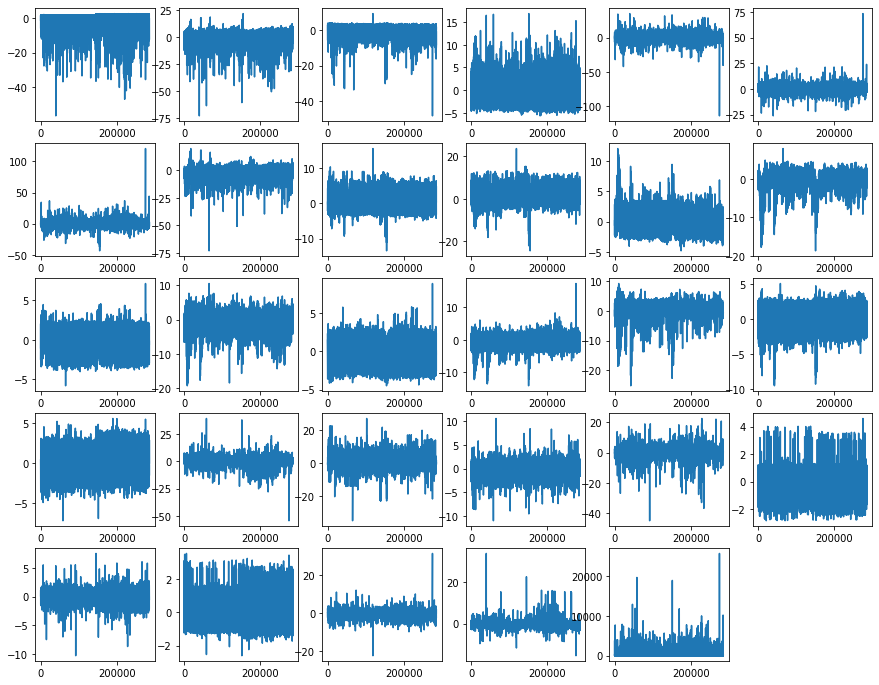

In [ ]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(data.V1) ; plt.subplot(5, 6, 15) ; plt.plot(data.V15)
plt.subplot(5, 6, 2) ; plt.plot(data.V2) ; plt.subplot(5, 6, 16) ; plt.plot(data.V16)
plt.subplot(5, 6, 3) ; plt.plot(data.V3) ; plt.subplot(5, 6, 17) ; plt.plot(data.V17)
plt.subplot(5, 6, 4) ; plt.plot(data.V4) ; plt.subplot(5, 6, 18) ; plt.plot(data.V18)
plt.subplot(5, 6, 5) ; plt.plot(data.V5) ; plt.subplot(5, 6, 19) ; plt.plot(data.V19)
plt.subplot(5, 6, 6) ; plt.plot(data.V6) ; plt.subplot(5, 6, 20) ; plt.plot(data.V20)
plt.subplot(5, 6, 7) ; plt.plot(data.V7) ; plt.subplot(5, 6, 21) ; plt.plot(data.V21)
plt.subplot(5, 6, 8) ; plt.plot(data.V8) ; plt.subplot(5, 6, 22) ; plt.plot(data.V22)
plt.subplot(5, 6, 9) ; plt.plot(data.V9) ; plt.subplot(5, 6, 23) ; plt.plot(data.V23)
plt.subplot(5, 6, 10) ; plt.plot(data.V10) ; plt.subplot(5, 6, 24) ; plt.plot(data.V24)
plt.subplot(5, 6, 11) ; plt.plot(data.V11) ; plt.subplot(5, 6, 25) ; plt.plot(data.V25)
plt.subplot(5, 6, 12) ; plt.plot(data.V12) ; plt.subplot(5, 6, 26) ; plt.plot(data.V26)
plt.subplot(5, 6, 13) ; plt.plot(data.V13) ; plt.subplot(5, 6, 27) ; plt.plot(data.V27)
plt.subplot(5, 6, 14) ; plt.plot(data.V14) ; plt.subplot(5, 6, 28) ; plt.plot(data.V28)
plt.subplot(5, 6, 29) ; plt.plot(data.Amount)
plt.show()

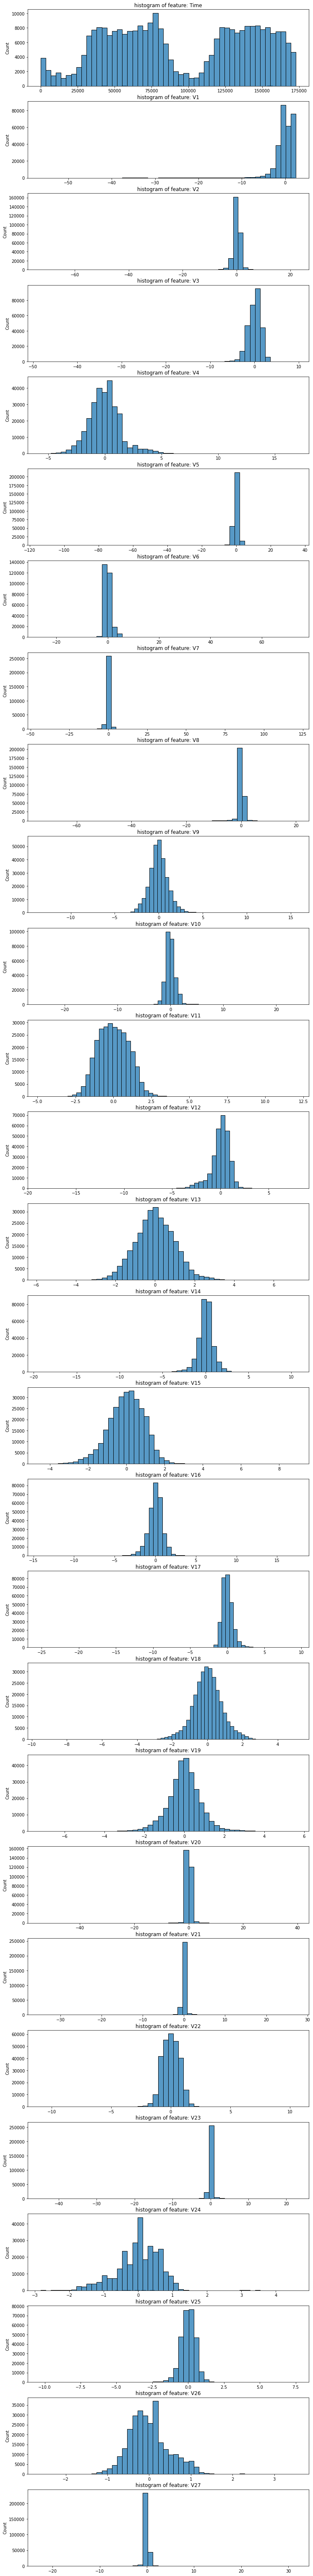

In [ ]:
from matplotlib import gridspec
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sb.histplot(data[c][data.Class == 1], bins=50)
 sb.histplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [3]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print(fraud.shape,valid.shape)

0.0017304750013189597
(492, 31) (284315, 31)


In [ ]:
print("Amount details of fraudulent transaction")
fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [4]:
# feature data (predictors)
X = data.iloc[:, :-1]

# label class
y = data['Class']

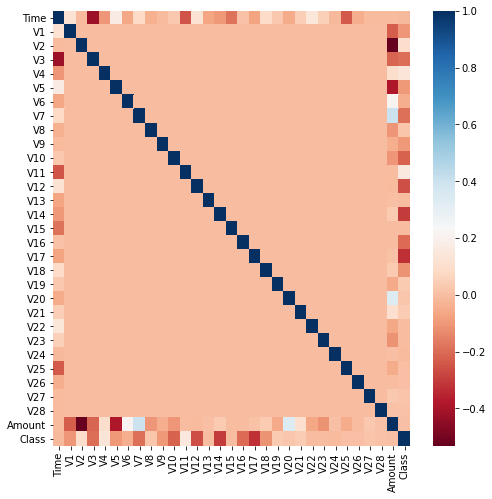

In [ ]:
plt.figure(figsize=(8, 8))
corr = data.corr()
sb.heatmap(corr, cmap='RdBu')

In [5]:
#Standardize data
#Scale the data to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        scaled_X, y, test_size=0.33, random_state=42)

In [7]:
# import imblearn library and resample the original data using SMOTE technique

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
xsmote,ysmote=smote.fit_resample(xTrain,yTrain)

In [ ]:
xsmote.shape

(380954, 30)

In [ ]:
ysmote.shape

(380954,)

# Boosting algorithm

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
#from sklearn.ensemble import GradientBoostingRegressor #For Regression
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(xsmote, ysmote)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
yPred = clf.predict(xTest) 
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Gradient Boost is {}".format(acc*100)) 

The accuracy of Gradient Boost is 98.01674699692511


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Gradient Boost classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc*100))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec*100))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec*100))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1*100))

The model used is Gradient Boost classifier
The accuracy is 98.01674699692511
The precision is 6.974410436527847
The recall is 93.28859060402685
The F1-Score is 12.978524743230627


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier() 
rfc.fit(xsmote, ysmote) 

yPred = rfc.predict(xTest) 
from sklearn.metrics import accuracy_score  
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Random forest is {}".format(acc)) 

The accuracy of Random forest is 0.9995531296881484


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is 0.9995531296881484
The precision is 0.8590604026845637
The recall is 0.8590604026845637
The F1-Score is 0.8590604026845637


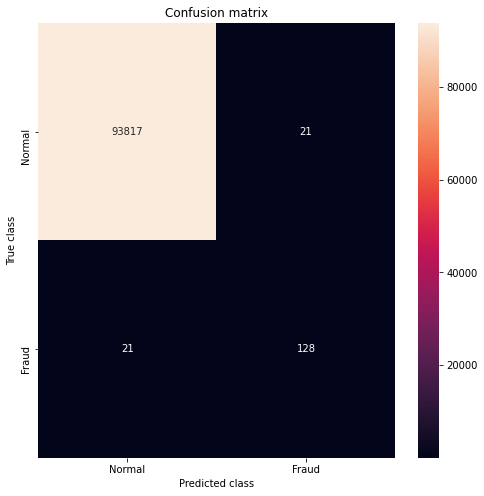

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Naive bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
gnb.fit(xsmote, ysmote)
yPred=gnb.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Naive Bayes is {}".format(acc)) 

The accuracy of Naive Bayes is 0.9761881962399055


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Naive Bayes classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1))

The model used is Naive Bayes classifier
The accuracy is 0.9761881962399055
The precision is 0.05534269902085994
The recall is 0.87248322147651
The F1-Score is 0.10408326661329062


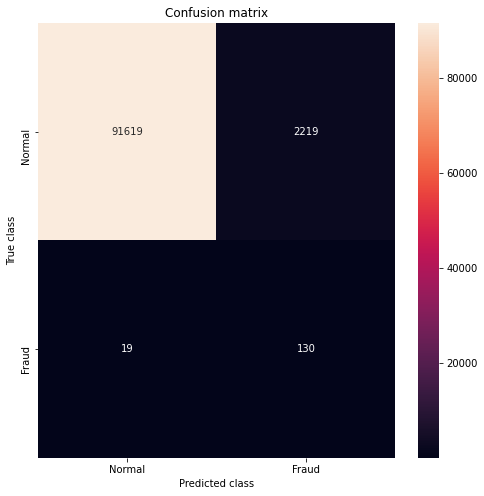

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Logistic regression

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression
clf=LogisticRegression()
clf.fit(xsmote, ysmote)
yPred=clf.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Logistic Regression is {}".format(acc)) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


The accuracy of Logistic Regression is 0.9746347899177545


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Logistic Regression classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1))

The model used is Logistic Regression classifier
The accuracy is 0.9746347899177545
The precision is 0.05460342766042248
The recall is 0.9194630872483222
The F1-Score is 0.10308502633559066


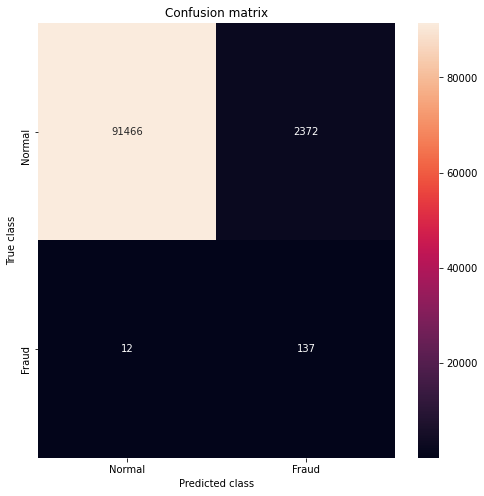

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dtc_clf=DecisionTreeClassifier() 
dtc_clf.fit(xsmote, ysmote) 
yPred=dtc_clf.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of Decision Tree is {}".format(acc)) 

The accuracy of Decision Tree is 0.997435815591518


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Decision Tree classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1))

The model used is Decision Tree classifier
The accuracy is 0.997435815591518
The precision is 0.35714285714285715
The recall is 0.7718120805369127
The F1-Score is 0.4883227176220807


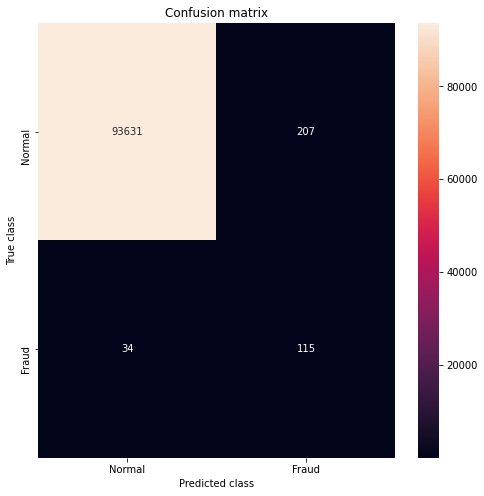

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# XGBOOST

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
regressor = XGBClassifier()

In [ ]:
regressor.fit(xsmote, ysmote)
yPred=regressor.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of XGBOOST is {}".format(acc)) 

The accuracy of XGBOOST is 0.9895198272101461


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is XGBOOST classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1))

The model used is XGBOOST classifier
The accuracy is 0.9895198272101461
The precision is 0.12274368231046931
The recall is 0.912751677852349
The F1-Score is 0.21638822593476534


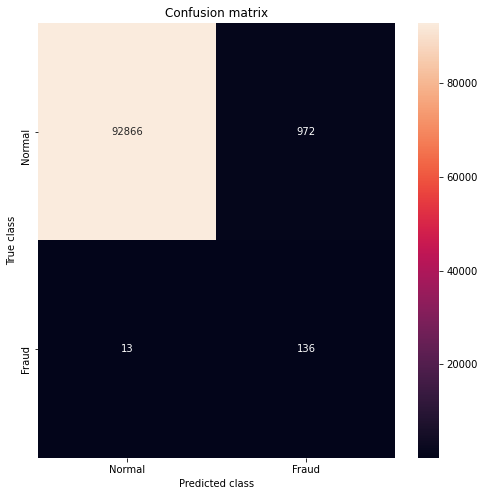

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 8))
sb.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(xsmote, ysmote)
yPred=clf.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of MLP is {}".format(acc*100)) 

The accuracy of MLP is 0.5447561896858075


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is MLP classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec*100))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec*100))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1*100))

The model used is MLP classifier
The accuracy is 0.005447561896858076
The precision is 0.14530225004807795
The recall is 91.2751677852349
The F1-Score is 0.290142617897106


In [ ]:
from sklearn.svm import SVC 
sc=SVC(kernel='rbf',random_state=0, gamma='auto', C=1) #kernel='linear'
sc_classifier=sc.fit(xsmote,ysmote)
yPred=sc_classifier.predict(xTest)
acc = accuracy_score(yTest, yPred) 
print("The accuracy of SVC is {}".format(acc)) 

The accuracy of SVC is 0.9975847723621352


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is SVC classifier")
acc= accuracy_score(yTest,yPred)
print("The accuracy is {}".format(acc*100))
prec= precision_score(yTest,yPred)
print("The precision is {}".format(prec*100))
rec= recall_score(yTest,yPred)
print("The recall is {}".format(rec*100))
f1= f1_score(yTest,yPred)
print("The F1-Score is {}".format(f1*100))

The model used is SVC classifier
The accuracy is 99.75847723621352
The precision is 37.17105263157895
The recall is 75.83892617449665
The F1-Score is 49.88962472406182


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xsmote,ysmote)
y_pred=classifier.predict(xTest)

In [51]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (y_pred != yTest).sum()
print("The model usedKNN SVC classifier")
acc= accuracy_score(yTest,y_pred)
print("The accuracy is {}".format(acc*100))
prec= precision_score(yTest,y_pred)
print("The precision is {}".format(prec*100))
rec= recall_score(yTest,y_pred)
print("The recall is {}".format(rec*100))
f1= f1_score(yTest,y_pred)
print("The F1-Score is {}".format(f1*100))

The model used is SVC classifier
The accuracy is 99.8021002904657
The precision is 43.89438943894389
The recall is 89.26174496644296
The F1-Score is 58.84955752212389


In [11]:
from sklearn.cluster import KMeans
classifier=KMeans(n_clusters=2)
classifier.fit(xTrain)
y_pred=classifier.predict(xTest)

In [10]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix #Not neccessary
n_outliers = len(fraud)
n_errors = (y_pred != yTest).sum()
print("The model used is KMeans Clusterer")
acc= accuracy_score(yTest,y_pred)
print("The accuracy is {}".format(acc*100))
prec= precision_score(yTest,y_pred)
print("The precision is {}".format(prec*100))
rec= recall_score(yTest,y_pred)
print("The recall is {}".format(rec*100))
f1= f1_score(yTest,y_pred)
print("The F1-Score is {}".format(f1*100))

The model used is KMeans Clusterer
The accuracy is 99.89253832976901
The precision is 82.43243243243244
The recall is 40.939597315436245
The F1-Score is 54.7085201793722


In [12]:
from sklearn.metrics import normalized_mutual_info_score,adjusted_rand_score,fowlkes_mallows_score,mean_squared_error
print('The clustering is kmeans')
print('The normalized mutual info is ',normalized_mutual_info_score(yTest,y_pred))#run this instead
print('The adjusted random score is ',adjusted_rand_score(yTest,y_pred))
print('The fowlkes mallows score is ',fowlkes_mallows_score(yTest,y_pred))
print('The Mean Squared error is ',mean_squared_error(yTest,y_pred))

The clustering is kmeans
The normalized mutual info is  2.775469392629276e-05
The adjusted random score is  -0.0012448014778326435
The fowlkes mallows score is  0.7084940729483166
The Mean Squared error is  0.4579250321853022


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:389: RuntimeWarning: overflow encountered in long_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


In [ ]:
from sklearn.cluster import DBSCAN
classifier=DBSCAN(eps=0.8,min_samples=10)
classifier.fit(xsmote,ysmote)
y_pred=classifier.predict(xTest)

In [8]:
from sklearn.metrics import normalized_mutual_info_score,adjusted_rand_score,fowlkes_mallows_score,mean_squared_error
print('The clustering is kmeans')
print('The normalized mutual info is ',normalized_mutual_info_score(yTest,y_pred))
print('The adjusted random score is ',adjusted_rand_score(yTest,y_pred))
print('The fowlkes mallows score is ',fowlkes_mallows_score(yTest,y_pred))
print('The Mean Squared error is ',mean_squared_error(yTest,y_pred))